In [2]:
# Standard modules

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score

In [3]:
# Import data for NL 2008-2017 seasons

nl_2008_2017 = pd.read_csv('nl_2008_2017.csv')
nl_2008_2017.shape

(155, 19)

In [4]:
nl_2008_2017.head()

,Team,Year,Wins,TeamWAR,AllP,SP,RP,Non-P,C,1B,2B,3B,SS,LF,CF,RF,OF (All),DH,PH
0,ARI,2008.0,82.0,30.1,22.7,18.1,5.0,7.4,1.2,0.2,2.1,0.7,3.2,-0.6,1.4,0.0,0.8,0.0,-0.8
1,ATL,2008.0,72.0,28.4,4.3,4.4,-0.1,24.1,4.1,4.1,2.6,7.6,3.3,0.3,2.2,-2.0,0.5,0.2,1.7
2,CHC,2008.0,97.0,49.0,29.1,22.9,5.6,19.9,2.8,1.9,3.3,3.0,2.2,2.4,1.6,0.9,4.9,0.1,1.7
3,CIN,2008.0,74.0,21.0,12.0,6.8,6.1,9.0,0.3,2.7,2.8,0.4,-1.1,2.6,0.5,0.6,3.7,0.0,0.2
4,COL,2008.0,74.0,26.6,13.0,8.2,6.5,13.6,2.4,1.0,1.7,1.2,1.8,5.8,-0.4,-0.2,5.2,0.0,0.3


In [5]:
# If we want to compare all these seasons, we should determine if TeamWAR and Wins have similar statistics across seasons.
# Here we set the columns for the summary df.

mean_wins = []
med_wins = []
std_wins = []
mean_team_war = []
med_team_war = []
std_team_war = []
for season in range(2008,2018):
    season_filter = nl_2008_2017['Year'] == season
    df = nl_2008_2017[season_filter].describe()
    mean_wins += [df['Wins']['mean']]
    med_wins += [df['Wins']['50%']]
    std_wins += [df['Wins']['std']]
    mean_team_war += [df['TeamWAR']['mean']]
    med_team_war += [df['TeamWAR']['50%']]
    std_team_war += [df['TeamWAR']['std']]
    
years = [i for i in range(2008,2018)]

In [6]:
# Making the summary df

summary_dic = {'Year' : years,
               'MeanWins' : mean_wins,
              'MedWins' : med_wins,
              'SDWins' : std_wins,
              'MeanTeamWar' : mean_team_war,
              'MedTeamWar' : med_team_war,
              'SDTeamWar' : std_team_war}
summary_2008_2017 = pd.DataFrame(data = summary_dic, columns = summary_dic.keys())
summary_2008_2017

,Year,MeanWins,MedWins,SDWins,MeanTeamWar,MedTeamWar,SDTeamWar
0,2008,79.437500,83.0,11.002841,29.775000,28.5,10.537267
1,2009,80.187500,81.5,11.094856,30.325000,29.5,10.402724
2,2010,80.500000,80.0,10.776518,29.831250,30.2,11.717151
3,2011,80.625000,79.5,11.763645,30.231250,29.4,9.133361
4,2012,80.000000,81.0,12.992305,29.950000,29.8,9.694603
5,2013,80.733333,76.0,11.093542,31.433333,29.5,9.817817
6,2014,80.133333,79.0,9.523405,31.213333,29.3,8.166733
7,2015,79.866667,79.0,13.097801,31.140000,35.3,11.470073
8,2016,79.866667,78.0,11.089678,31.100000,29.9,12.365852
9,2017,80.333333,77.0,12.378938,31.040000,26.7,11.945041


How can we decide if these values are consistent enough for comparison? At a glance, 2013 MedWins and 2015 MedTeamWar appear like outliers.

According to Baseball Reference, the standard conversion for Team WAR to wins is 
<center>wins = Team WAR + .294 x 162.</center>
This has the advantage that is can be used at any point in the season by replacing 162 with games played. We will start by doing a linear regression with the data from NL 2017 and compare the results. Note that .294 x 162 = 47.628.




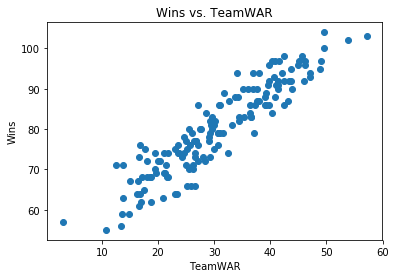

In [7]:
# Scatterplot of Wins vs TeamWAR

team_war_values = nl_2008_2017['TeamWAR']
wins_values = nl_2008_2017['Wins']

plt.scatter(team_war_values, wins_values)
plt.title('Wins vs. TeamWAR')
plt.xlabel('TeamWAR')
plt.ylabel('Wins')
plt.show()

In [8]:
# Regression line
X = pd.DataFrame(nl_2008_2017['TeamWAR'])
y = nl_2008_2017['Wins']
lm = linear_model.LinearRegression()
lm.fit(X,y)
coefficient = float(lm.coef_)
intercept = float(lm.intercept_)
print(coefficient)
print(intercept)

1.0053465398152321
49.41905586256729


The coefficient and intercept are similar to the standard formula from BR.

In [9]:
# BR model for estimating wins

def br_wins(team_war):
    return team_war + .294 * 162

In [10]:
# Data frame comparing wins and the two estimates
years = nl_2008_2017['Year']
teams = nl_2008_2017['Team']
wins = nl_2008_2017['Wins']
reg_wins_est = lm.predict(X)
br_wins_est = [br_wins(team_war) for team_war in nl_2008_2017['TeamWAR']]
wins_dic = {'Year' : years,
           'Team' : teams,
           'Wins' : wins,
           'RegWins' : reg_wins_est,
           'BRWins' : br_wins_est}
wins_df = pd.DataFrame(data = wins_dic, columns = wins_dic.keys())
wins_df.head()

,Year,Team,Wins,RegWins,BRWins
0,2008.0,ARI,82.0,79.679987,77.728
1,2008.0,ATL,72.0,77.970898,76.028
2,2008.0,CHC,97.0,98.681036,96.628
3,2008.0,CIN,74.0,70.531333,68.628
4,2008.0,COL,74.0,76.161274,74.228


In [11]:
# R^2 scores

print('Regression estimate R^2 score:')
print(r2_score(wins, reg_wins_est))
print('BR estimate R^2 score:')
print(r2_score(wins, br_wins_est))

Regression estimate R^2 score:
0.855388245827
BR estimate R^2 score:
0.824675266214


The R^2 scores are not terrible. However, we might be able to do better by dividing pitching and hitting.

In [12]:
# Separate pitching and hitting.

X_ref = nl_2008_2017.filter(['AllP', 'Non-P'], axis = 1)
y = nl_2008_2017['Wins']
lm.fit(X_ref,y)
refined_prediction = list(lm.predict(X_ref))
wins_df.insert(loc = 4, column = 'RefRegWins', value = refined_prediction)
wins_df.head()

,Year,Team,Wins,RegWins,RefRegWins,BRWins
0,2008.0,ARI,82.0,79.679987,80.255242,77.728
1,2008.0,ATL,72.0,77.970898,77.568982,76.028
2,2008.0,CHC,97.0,98.681036,99.066957,96.628
3,2008.0,CIN,74.0,70.531333,70.772806,68.628
4,2008.0,COL,74.0,76.161274,76.296654,74.228


In [13]:
# Check the refined score

print('Regression estimate R^2 score:')
print(r2_score(wins, refined_prediction))

Regression estimate R^2 score:
0.855976953872


There is not a siginificant difference between the refined and un-refined R^2 score. This may suggest that pitching and hitting roughly contribute equally to wins.

We can do the exact same analysis for the AL.

In [14]:
# Import data for AL 2008-2017 seasons

al_2008_2017 = pd.read_csv('al_2008_2017.csv')
al_2008_2017.shape

(145, 19)

In [16]:
# If we want to compare all these seasons, we should determine if TeamWAR and Wins have similar statistics across seasons.
# Here we set the columns for the summary df.

mean_wins = []
med_wins = []
std_wins = []
mean_team_war = []
med_team_war = []
std_team_war = []
for season in range(2008,2018):
    season_filter = al_2008_2017['Year'] == season
    df = al_2008_2017[season_filter].describe()
    mean_wins += [df['Wins']['mean']]
    med_wins += [df['Wins']['50%']]
    std_wins += [df['Wins']['std']]
    mean_team_war += [df['TeamWAR']['mean']]
    med_team_war += [df['TeamWAR']['50%']]
    std_team_war += [df['TeamWAR']['std']]
    
years = [i for i in range(2008,2018)]

# Making the summary df

summary_dic = {'Year' : years,
               'MeanWins' : mean_wins,
              'MedWins' : med_wins,
              'SDWins' : std_wins,
              'MeanTeamWar' : mean_team_war,
              'MedTeamWar' : med_team_war,
              'SDTeamWar' : std_team_war}
summary_2008_2017 = pd.DataFrame(data = summary_dic, columns = summary_dic.keys())
summary_2008_2017

,Year,MeanWins,MedWins,SDWins,MeanTeamWar,MedTeamWar,SDTeamWar
0,2008,82.642857,83.5,11.338207,37.150000,37.95,10.132943
1,2009,81.928571,84.5,12.162137,36.692857,36.90,10.264237
2,2010,81.571429,83.0,11.640211,37.242857,40.25,10.057505
3,2011,81.357143,80.5,11.432795,36.771429,35.50,12.704356
4,2012,82.142857,86.5,10.967484,37.192857,40.15,10.002420
5,2013,81.333333,85.0,13.704361,35.100000,36.50,12.785483
6,2014,81.866667,84.0,9.927355,35.333333,37.80,8.676130
7,2015,82.066667,81.0,7.225616,35.460000,35.80,7.795127
8,2016,81.933333,84.0,10.511672,35.533333,35.60,8.485001
9,2017,81.666667,80.0,11.010817,35.506667,31.00,11.747733


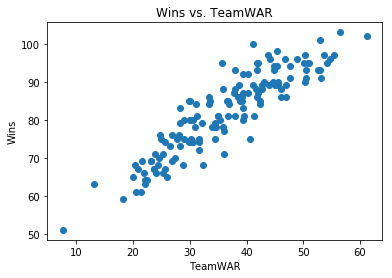

In [17]:
# Scatterplot of Wins vs TeamWAR

team_war_values = al_2008_2017['TeamWAR']
wins_values = al_2008_2017['Wins']

plt.scatter(team_war_values, wins_values)
plt.title('Wins vs. TeamWAR')
plt.xlabel('TeamWAR')
plt.ylabel('Wins')
plt.show()

In [19]:
# Regression line
X = pd.DataFrame(al_2008_2017['TeamWAR'])
y = al_2008_2017['Wins']
lm = linear_model.LinearRegression()
lm.fit(X,y)
coefficient = float(lm.coef_)
intercept = float(lm.intercept_)
print(coefficient)
print(intercept)

0.9652020068932844
46.936586444460616


In [21]:
# Data frame comparing wins and the two estimates
years = al_2008_2017['Year']
teams = al_2008_2017['Team']
wins = al_2008_2017['Wins']
reg_wins_est = lm.predict(X)
br_wins_est = [br_wins(team_war) for team_war in al_2008_2017['TeamWAR']]
wins_dic = {'Year' : years,
           'Team' : teams,
           'Wins' : wins,
           'RegWins' : reg_wins_est,
           'BRWins' : br_wins_est}
wins_df = pd.DataFrame(data = wins_dic, columns = wins_dic.keys())
wins_df.head()

,Year,Team,Wins,RegWins,BRWins
0,2008.0,BAL,68.0,70.487515,72.028
1,2008.0,BOS,95.0,99.250535,101.828
2,2008.0,CHW,89.0,90.370677,92.628
3,2008.0,CLE,81.0,83.614263,85.628
4,2008.0,DET,74.0,76.182207,77.928


In [22]:
# R^2 scores

print('Regression estimate R^2 score:')
print(r2_score(wins, reg_wins_est))
print('BR estimate R^2 score:')
print(r2_score(wins, br_wins_est))

Regression estimate R^2 score:
0.821193095074
BR estimate R^2 score:
0.786954047113


In [23]:
# Separate pitching and hitting.

X_ref = al_2008_2017.filter(['AllP', 'Non-P'], axis = 1)
y = al_2008_2017['Wins']
lm.fit(X_ref,y)
refined_prediction = list(lm.predict(X_ref))
wins_df.insert(loc = 4, column = 'RefRegWins', value = refined_prediction)
wins_df.head()

,Year,Team,Wins,RegWins,RefRegWins,BRWins
0,2008.0,BAL,68.0,70.487515,69.789140,72.028
1,2008.0,BOS,95.0,99.250535,99.376867,101.828
2,2008.0,CHW,89.0,90.370677,91.116004,92.628
3,2008.0,CLE,81.0,83.614263,82.979397,85.628
4,2008.0,DET,74.0,76.182207,75.911570,77.928


In [24]:
# Check the refined score

print('Regression estimate R^2 score:')
print(r2_score(wins, refined_prediction))

Regression estimate R^2 score:
0.823377934997
